# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Missing Values?

In [3]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### We don't have any missing values

# Duplicates?

In [4]:
duplicates_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 24


In [5]:
data =  data.drop_duplicates()

# Check for Outliers

In [6]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
numerical_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

In [8]:
print(data.shape)

(32537, 15)


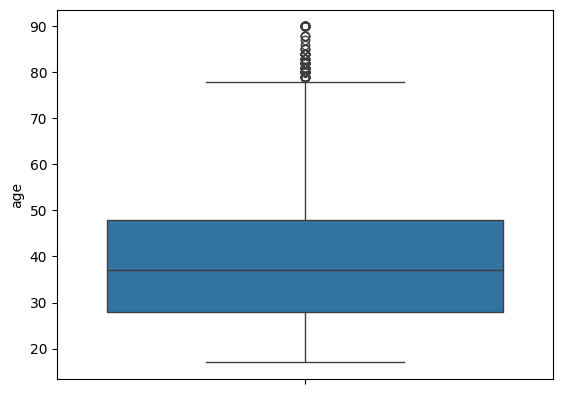

In [9]:
# For age column
sns.boxplot(data['age'])
plt.show()

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[(data['age'] >= lower) & (data['age'] <= upper)]


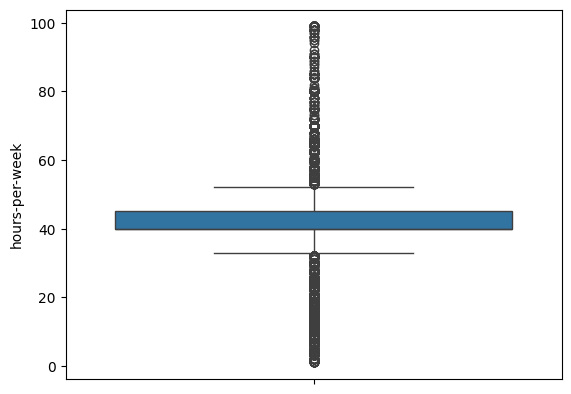

In [10]:
# For hours-per-week column
sns.boxplot(data['hours-per-week'])
plt.show()


### Many outliers present which can indicate workaholics and part-time workers. Since it's out target variable, I will not remove outliers here

In [11]:
# For column capital-gain - Log Transform
data['capital-gain-log'] = np.log1p(data['capital-gain'])
data = data.drop('capital-gain', axis=1)

# For column capital-loss - Log Transform
data['capital-loss-log'] = np.log1p(data['capital-loss'])
data = data.drop('capital-loss', axis=1)

In [12]:
print(data.shape)

(32395, 15)


### Columns: workclass, education, marital-status, occupation, relationship, race, sex (binary), native-country and income are categorical

# Encode data

In [33]:
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
drop_first = True
one_hot_encoded = pd.get_dummies(data, columns = categorical_columns)
print(one_hot_encoded.head())

   age  fnlwgt  education-num  hours-per-week  capital-gain-log  \
0   39   77516             13              40          7.684784   
1   50   83311             13              13          0.000000   
2   38  215646              9              40          0.000000   
3   53  234721              7              40          0.000000   
4   28  338409             13              40          0.000000   

   capital-loss-log  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0               0.0        False                  False                False   
1               0.0        False                  False                False   
2               0.0        False                  False                False   
3               0.0        False                  False                False   
4               0.0        False                  False                False   

   workclass_Never-worked  ...  native-country_Scotland  native-country_South  \
0                   False  ...     

In [34]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32395 entries, 0 to 32560
Columns: 110 entries, age to income_>50K
dtypes: bool(104), float64(2), int64(4)
memory usage: 4.9 MB


In [35]:
bool_cols = one_hot_encoded.select_dtypes(include='bool').columns
one_hot_encoded[bool_cols] = one_hot_encoded[bool_cols].astype(int)

# Correlation Matrix

hours-per-week                       1.000000
relationship_Husband                 0.247996
sex_Male                             0.230560
income_>50K                          0.229714
marital-status_Married-civ-spouse    0.214193
education-num                        0.148097
occupation_Exec-managerial           0.140466
workclass_Self-emp-inc               0.129011
workclass_Self-emp-not-inc           0.096248
occupation_Farming-fishing           0.095588
age                                  0.084973
capital-gain-log                     0.084232
education_Bachelors                  0.078212
education_Prof-school                0.077304
occupation_Transport-moving          0.076803
education_Masters                    0.064030
education_Doctorate                  0.061316
occupation_Prof-specialty            0.060339
occupation_Craft-repair              0.056248
capital-loss-log                     0.051262
Name: hours-per-week, dtype: float64


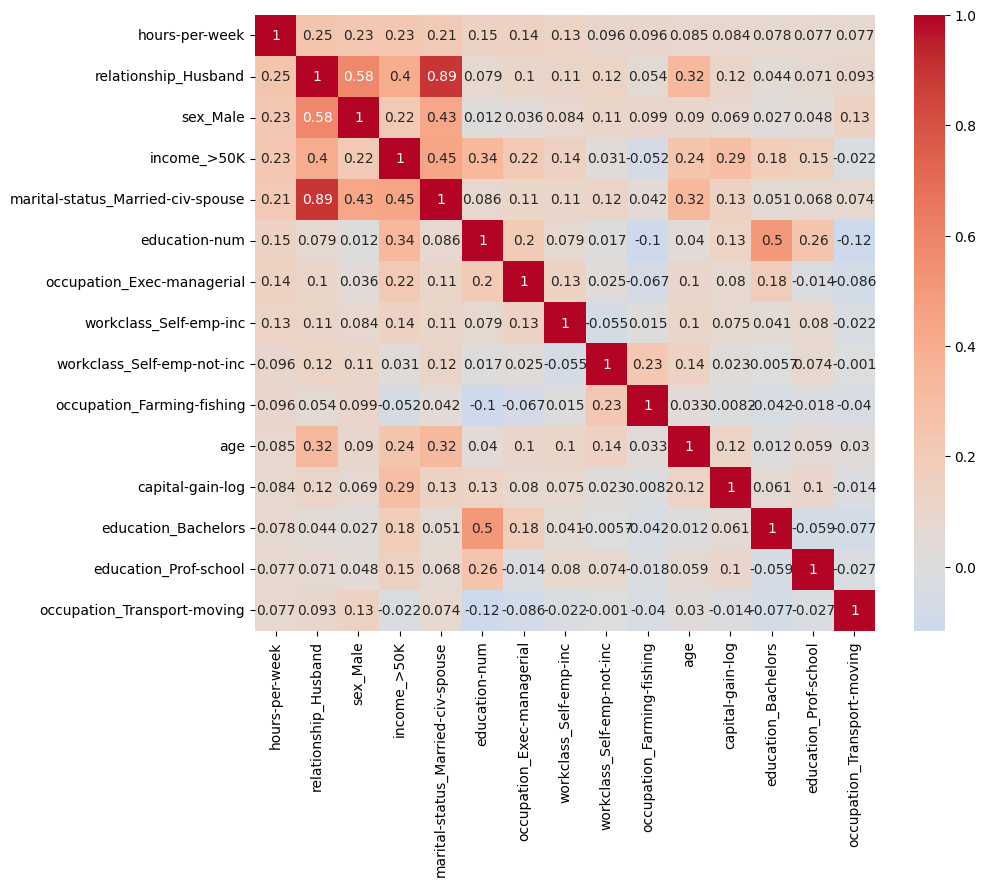

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = one_hot_encoded.corr()
target_corr = correlation_matrix['hours-per-week'].sort_values(ascending=False)
print(target_corr.head(20))
top_features = target_corr.head(15).index
plt.figure(figsize=(10, 8))
sns.heatmap(one_hot_encoded[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

### relationship_husband: 0.25 (best predictor)
### married men work the most hours
### other positive correlations: sex_male, income>50k, education-num

# Feature Engineering

In [37]:
# combine relationship_husband and marital_status 
one_hot_encoded['married_male'] = (
    one_hot_encoded['relationship_Husband'] * one_hot_encoded['sex_Male']
)

#combine education-num and income_>50K (0.23, 0.15) to check if they have a stronger correlation with hours-per-week
one_hot_encoded['high_income_educated'] = (
    one_hot_encoded['education-num'] * one_hot_encoded['income_>50K']
)

# self employed people might work less hours (-0.096)
one_hot_encoded['is_self_employed'] = (
    one_hot_encoded.get('workclass_Self-emp-inc', 0) + 
    one_hot_encoded.get('workclass_Self-emp-not-inc', 0)
).clip(0, 1)

# check for advanced degrees
one_hot_encoded['has_advanced_degree'] = (
    one_hot_encoded.get('education_Bachelors', 0) + 
    one_hot_encoded.get('education_Prof-school', 0) +
    one_hot_encoded.get('education_Masters', 0) +
    one_hot_encoded.get('education_Doctorate', 0)
).clip(0, 1)

# jobs that work around a schedule that might differ
one_hot_encoded['likely_part_time'] = (
    one_hot_encoded.get('occupation_Farming-fishing', 0) +
    one_hot_encoded.get('workclass_Self-emp-not-inc', 0)
).clip(0, 1)

C:\Users\iarin\AppData\Local\Temp\ipykernel_21392\2480848371.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_encoded['married_male'] = (
C:\Users\iarin\AppData\Local\Temp\ipykernel_21392\2480848371.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_encoded['high_income_educated'] = (
C:\Users\iarin\AppData\Local\Temp\ipykernel_21392\2480848371.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

In [38]:
new_features = [
    'married_male',
    'high_income_educated', 
    'is_self_employed',
    'has_advanced_degree',
    'likely_part_time'
]

In [39]:
for feature in new_features:
    if feature in one_hot_encoded.columns:
        corr = one_hot_encoded[feature].corr(one_hot_encoded['hours-per-week'])
        print(f"{feature:30s}: {corr:+.4f}")

married_male                  : +0.2480
high_income_educated          : +0.2299
is_self_employed              : +0.1561
has_advanced_degree           : +0.1398
likely_part_time              : +0.1024


In [41]:
# Top correlations before feature engineering
print("Top 10 original correlations:")
original_corr = one_hot_encoded.corr()['hours-per-week'].abs().sort_values(ascending=False)
print(original_corr.head(11))  

# After feature engineering
print("After feature engineering:")
all_corr = one_hot_encoded.corr()['hours-per-week'].abs().sort_values(ascending=False)
for feat in new_features:
    if feat in all_corr.index:
        rank = list(all_corr.index).index(feat) + 1
        print(f"{feat}: rank #{rank}, correlation {all_corr[feat]:.4f}")

Top 10 original correlations:
hours-per-week                       1.000000
relationship_Own-child               0.252021
married_male                         0.248001
relationship_Husband                 0.247996
sex_Female                           0.230560
sex_Male                             0.230560
high_income_educated                 0.229907
income_>50K                          0.229714
income_<=50K                         0.229714
marital-status_Married-civ-spouse    0.214193
marital-status_Never-married         0.201731
Name: hours-per-week, dtype: float64
After feature engineering:
married_male: rank #3, correlation 0.2480
high_income_educated: rank #7, correlation 0.2299
is_self_employed: rank #15, correlation 0.1561
has_advanced_degree: rank #18, correlation 0.1398
likely_part_time: rank #21, correlation 0.1024


In [42]:
features_to_keep = ['married_male', 'high_income_educated', 'is_self_employed']

In [44]:
one_hot_encoded = one_hot_encoded.drop(columns=['relationship_Husband','has_advanced_degree', 'likely_part_time'], errors='ignore')

# Standardization

In [45]:

from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain-log', 'capital-loss-log']
scaler = StandardScaler()
one_hot_encoded[numeric_cols] = scaler.fit_transform(one_hot_encoded[numeric_cols])

# Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = one_hot_encoded.drop('hours-per-week', axis=1)
y = one_hot_encoded['hours-per-week']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R²: 0.22
RMSE: 10.85


# Save work

In [51]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
one_hot_encoded.to_csv('census_preprocessed_full.csv', index=False)